In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [64]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR/0_conc


In [65]:
# mac       - phase III - LPR - 240 timepoints
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/behavior/LPR/wide/devel/Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())
display(df_lpr.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,2636,15838,A01,2636_15838_A01,67.0,1.308,0.000,0.000,0.000,1.924,0.000,0.000,0.000,3.385,0.000,4.273,6.879,1.368,0.406,0.391,0.000,0.588,0.616,0.944,0.123,1.067,0.866,16.461,6.64,0.376,2.313,0.775,0.605,10.113,11.014,12.437000,22.872000,20.561,16.174,13.604,15.235,13.603000,16.065,17.603,18.165,15.848,14.074,15.811,16.059,17.652,12.541,15.390,16.511,18.932,13.967,16.964,19.189,13.757000,11.600,15.499,18.795,15.234,18.695,13.126,13.512,9.488,1.645,0.000,0.000,0.437,0.0,0.154,0.000,0.544,0.827,0.902,0.000,0.000,0.000,3.482,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,27.338,25.740001,10.473,20.055,7.710,17.216001,17.941,15.636,14.188,15.959000,14.277,10.147,10.146,11.824000,13.273,10.286,12.075,10.999,12.309,10.613,9.902,10.115,13.526,9.453,17.284,8.863,12.028,8.633,10.629,10.452000,17.578000,13.506,0.0,0.000,0.000,0.092,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.151,27.725001,20.216,11.628,15.834,11.367,13.071,12.617,19.372,6.780,12.662,7.060,12.308,11.842,15.124,14.059,8.166,15.013,13.097,14.577001,2.288,0.412,0.000,4.204,0.0,0.0,0.0,7.524,5.876,10.429,12.712,0.0,0.0,1.103,3.426,0.0,0.566,0.432,0.455,0.0,0.0,0.0,0.9,2.109,13.324,19.38,0.387,0.512,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.615,18.649,16.538,16.228001,10.952,12.114,9.233,14.894,11.655,12.564,9.062,7.445,13.322,13.724,11.182,8.587,11.582,14.540,5.677,9.773,14.136,8.196,11.581,11.773,14.055,11.613,10.301,7.955,11.071,14.536
1,2636,15838,A02,2636_15838_A02,67.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.450,1.646,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,5.574000,0.000000,1.481,0.000,25.773,11.788,25.302001,22.848,22.406,19.180,14.674,13.106,20.924,3.165,0.000,7.289,19.182,22.544,18.103,10.100,19.553,12.770,13.370000,12.490,17.038,15.632,13.105,12.922,14.413,12.917,24.763,21.413,3.243,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,16.624001,17.967,21.787,10.631,12.812000,14.435,10.318,9.711,15.180001,17.675,12.590,12.057,14.741001,13.805,16.140,17.303,9.732,8.440,13.454,13.156,15.857,17.308,19.023,13.375,11.843,12.954,19.125,15.340,13.610000,29.045000,13.369,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,18.308,23.208,15.149,16.075,12.869,14.484,0.838,0.000,0.000,0.000,0.000,1.030,12.909000,13.186,21.587,4.961,0.000,0.0,0.0,0.0,0.000,0.746,0.000,0.000,0.0,0.0,1.492,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,2.475,24.091,14.087,0.817000,0

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
3739,4387,21553,H07,4387_21553_H07,0.410,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.051,0.0,5.909,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,3.657,0.000,26.146,13.133,20.048,26.019,20.411,4.701,2.628,22.791999,15.966,19.720001,16.559,18.327,17.755,21.034001,22.093,26.837,13.353,3.093,3.738,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1.18,0.0,1.654,0.0,0.676,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,3.284,0.0,3.931,17.162,29.225999,26.106,16.452,19.095001,2.498,17.956000,17.575,24.171,19.930999,13.092,16.460,13.494,15.857,36.434,11.712000,5.170,0.0,0.00,0.000,1.218,14.457,14.333,10.278,0.0,0.0,4.249,0.430,0.000,0.331,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,3.236,0.0,0.0,0.0,0.661,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,18.475,27.016,25.600001,16.641,12.689,19.979,16.294,29.956001,11.408,3.354,11.378,16.621,13.802,12.005,11.514,2.118,3.349,0.635,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.614,0.0,0.000,0.0,0.0,0.535,0.000,0.000,0.137,0.000,0.000,1.531,0.000,0.000,0.000,0.0,0.00,3.715,0.0,0.0,0.000,0.000,3.199,8.558,21.663,6.048,5.326,0.267,1.029,0.000,0.000,0.0,4.976,29.466,21.574,9.657,8.806,12.629,17.148,15.883,17.568,18.717
3740,4387,21553,H08,4387_21553_H08,0.140,6.598,0.000,0.0,1.285,0.000,0.000,0.0,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.695,0.0,0.113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,13.225,2.557,1.128,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,2.771,1.468,9.846,6.461,16.631,13.662,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.464,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,4.826000,0.142,0.000,0.000000,0.000,0.000000,0.000,0.000,1.941000,3.201,0.000,0.000,2.331,12.943,4.868000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,1.077,3.055,0.000,0.0,0.0,0.0,0.0,0.0,0.905,1.429,0.0,0.0,0.864,1.431,1.308,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.713,0.0,0.0,4.616,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.000,1.142,0.000,0.000,3.693,2.330000,0.000,0.000,0.000,0.000000,0.000,0.000,3.265,1.705,14.850000,12.632,6.164,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.737,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.000,1.415,1.171,1.049,1.914,0.433,0.000,1.297,1.054,0.748,0.0,3.12,4.128,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.119,0.538,0.000,0.000,0.0,2.643,0.402,0.337,0.000,0.000,0.000,2.383,1.978,3.067,1.078
3741,4387,21553,H09,4387_21553_H09,0.046,4.440,2.287,0.0,0.000,0.000,0.442,0.0,1.23,0.0,0.221,0.275,0.339,0.563,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0

In [66]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

18

array(['1607', '1898', '2090', '2636', '2685', '2715', '2739', '4348',
       '4357', '4382', '4387', '4390', '4395', '4403', '4407', '4417',
       '4424', '4453'], dtype=object)

In [67]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

42

array(['12514', '12521', '12524', '12527', '12534', '12535', '14317',
       '14350', '14427', '14429', '15666', '15667', '15722', '15838',
       '15839', '15840', '15875', '15876', '21469', '21470', '21505',
       '21516', '21517', '21518', '21553', '21559', '21576', '21586',
       '21587', '21590', '21593', '21605', '21608', '21613', '21616',
       '21719', '21842', '21843', '21874', '21882', '22190', '22201'],
      dtype=object)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,2636,15838,A01,2636_15838_A01,67.0,1.308,0.000,0.000,0.000,1.924,0.000,0.000,0.000,3.385,0.000,4.273,6.879,1.368,0.406,0.391,0.000,0.588,0.616,0.944,0.123,1.067,0.866,16.461,6.64,0.376,2.313,0.775,0.605,10.113,11.014,12.437000,22.872000,20.561,16.174,13.604,15.235,13.603000,16.065,17.603,18.165,15.848,14.074,15.811,16.059,17.652,12.541,15.390,16.511,18.932,13.967,16.964,19.189,13.757000,11.600,15.499,18.795,15.234,18.695,13.126,13.512,9.488,1.645,0.000,0.000,0.437,0.0,0.154,0.000,0.544,0.827,0.902,0.000,0.000,0.000,3.482,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,27.338,25.740001,10.473,20.055,7.710,17.216001,17.941,15.636,14.188,15.959000,14.277,10.147,10.146,11.824000,13.273,10.286,12.075,10.999,12.309,10.613,9.902,10.115,13.526,9.453,17.284,8.863,12.028,8.633,10.629,10.452000,17.578000,13.506,0.0,0.000,0.000,0.092,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.151,27.725001,20.216,11.628,15.834,11.367,13.071,12.617,19.372,6.780,12.662,7.060,12.308,11.842,15.124,14.059,8.166,15.013,13.097,14.577001,2.288,0.412,0.000,4.204,0.0,0.0,0.0,7.524,5.876,10.429,12.712,0.0,0.0,1.103,3.426,0.0,0.566,0.432,0.455,0.0,0.0,0.0,0.9,2.109,13.324,19.38,0.387,0.512,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.615,18.649,16.538,16.228001,10.952,12.114,9.233,14.894,11.655,12.564,9.062,7.445,13.322,13.724,11.182,8.587,11.582,14.540,5.677,9.773,14.136,8.196,11.581,11.773,14.055,11.613,10.301,7.955,11.071,14.536
1,2636,15838,A02,2636_15838_A02,67.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.450,1.646,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,5.574000,0.000000,1.481,0.000,25.773,11.788,25.302001,22.848,22.406,19.180,14.674,13.106,20.924,3.165,0.000,7.289,19.182,22.544,18.103,10.100,19.553,12.770,13.370000,12.490,17.038,15.632,13.105,12.922,14.413,12.917,24.763,21.413,3.243,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,16.624001,17.967,21.787,10.631,12.812000,14.435,10.318,9.711,15.180001,17.675,12.590,12.057,14.741001,13.805,16.140,17.303,9.732,8.440,13.454,13.156,15.857,17.308,19.023,13.375,11.843,12.954,19.125,15.340,13.610000,29.045000,13.369,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,18.308,23.208,15.149,16.075,12.869,14.484,0.838,0.000,0.000,0.000,0.000,1.030,12.909000,13.186,21.587,4.961,0.000,0.0,0.0,0.0,0.000,0.746,0.000,0.000,0.0,0.0,1.492,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,2.475,24.091,14.087,0.817000,0

## Load morphological data for filtering wells that have dead fish

In [68]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_III/input/morpho/full/wide/Tanguay_Phase_3_zf_morphology_data_PNNL_2021MAR23_full_w_all_endpoints.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,725,21511,A01,725_21511_A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,725,21511,A02,725_21511_A02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,725,21511,A03,725_21511_A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,725,21511,A04,725_21511_A04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,725,21511,A05,725_21511_A05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


61419

In [69]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) # 8 seconds took for 13 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,2636,15838,A01,2636_15838_A01,67.0,1.308,0.000,0.000,0.000,1.924,0.000,0.000,0.000,3.385,0.000,4.273,6.879,1.368,0.406,0.391,0.000,0.588,0.616,0.944,0.123,1.067,0.866,16.461,6.64,0.376,2.313,0.775,0.605,10.113,11.014,12.437000,22.872000,20.561,16.174,13.604,15.235,13.603000,16.065,17.603,18.165,15.848,14.074,15.811,16.059,17.652,12.541,15.390,16.511,18.932,13.967,16.964,19.189,13.757000,11.600,15.499,18.795,15.234,18.695,13.126,13.512,9.488,1.645,0.000,0.000,0.437,0.0,0.154,0.000,0.544,0.827,0.902,0.000,0.000,0.000,3.482,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,27.338,25.740001,10.473,20.055,7.710,17.216001,17.941,15.636,14.188,15.959000,14.277,10.147,10.146,11.824000,13.273,10.286,12.075,10.999,12.309,10.613,9.902,10.115,13.526,9.453,17.284,8.863,12.028,8.633,10.629,10.452000,17.578000,13.506,0.0,0.000,0.000,0.092,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.151,27.725001,20.216,11.628,15.834,11.367,13.071,12.617,19.372,6.780,12.662,7.060,12.308,11.842,15.124,14.059,8.166,15.013,13.097,14.577001,2.288,0.412,0.000,4.204,0.0,0.0,0.0,7.524,5.876,10.429,12.712,0.0,0.0,1.103,3.426,0.0,0.566,0.432,0.455,0.0,0.0,0.0,0.9,2.109,13.324,19.38,0.387,0.512,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.615,18.649,16.538,16.228001,10.952,12.114,9.233,14.894,11.655,12.564,9.062,7.445,13.322,13.724,11.182,8.587,11.582,14.540,5.677,9.773,14.136,8.196,11.581,11.773,14.055,11.613,10.301,7.955,11.071,14.536,2636_15838_A01
1,2636,15838,A02,2636_15838_A02,67.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.450,1.646,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,5.574000,0.000000,1.481,0.000,25.773,11.788,25.302001,22.848,22.406,19.180,14.674,13.106,20.924,3.165,0.000,7.289,19.182,22.544,18.103,10.100,19.553,12.770,13.370000,12.490,17.038,15.632,13.105,12.922,14.413,12.917,24.763,21.413,3.243,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,16.624001,17.967,21.787,10.631,12.812000,14.435,10.318,9.711,15.180001,17.675,12.590,12.057,14.741001,13.805,16.140,17.303,9.732,8.440,13.454,13.156,15.857,17.308,19.023,13.375,11.843,12.954,19.125,15.340,13.610000,29.045000,13.369,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,18.308,23.208,15.149,16.075,12.869,14.484,0.838,0.000,0.000,0.000,0.000,1.030,12.909000,13.186,21.587,4.961,0.000,0.0,0.0,0.0,0.000,0.746,0.000,0.000,0.0,0.0,1.492,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0

Done, it took:8.4 seconds


In [70]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(3744, 246)
df_lpr_filtered.shape:(3333, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,2636,15838,A01,2636_15838_A01,67.0,1.308,0.000,0.000,0.000,1.924,0.000,0.000,0.000,3.385,0.000,4.273,6.879,1.368,0.406,0.391,0.000,0.588,0.616,0.944,0.123,1.067,0.866,16.461,6.64,0.376,2.313,0.775,0.605,10.113,11.014,12.437000,22.872000,20.561,16.174,13.604,15.235,13.603000,16.065,17.603,18.165,15.848,14.074,15.811,16.059,17.652,12.541,15.390,16.511,18.932,13.967,16.964,19.189,13.757000,11.600,15.499,18.795,15.234,18.695,13.126,13.512,9.488,1.645,0.000,0.000,0.437,0.0,0.154,0.000,0.544,0.827,0.902,0.000,0.000,0.000,3.482,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,27.338,25.740001,10.473,20.055,7.710,17.216001,17.941,15.636,14.188,15.959000,14.277,10.147,10.146,11.824000,13.273,10.286,12.075,10.999,12.309,10.613,9.902,10.115,13.526,9.453,17.284,8.863,12.028,8.633,10.629,10.452000,17.578000,13.506,0.0,0.000,0.000,0.092,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.151,27.725001,20.216,11.628,15.834,11.367,13.071,12.617,19.372,6.780,12.662,7.060,12.308,11.842,15.124,14.059,8.166,15.013,13.097,14.577001,2.288,0.412,0.000,4.204,0.0,0.0,0.0,7.524,5.876,10.429,12.712,0.0,0.0,1.103,3.426,0.0,0.566,0.432,0.455,0.0,0.0,0.0,0.9,2.109,13.324,19.38,0.387,0.512,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.615,18.649,16.538,16.228001,10.952,12.114,9.233,14.894,11.655,12.564,9.062,7.445,13.322,13.724,11.182,8.587,11.582,14.540,5.677,9.773,14.136,8.196,11.581,11.773,14.055,11.613,10.301,7.955,11.071,14.536,2636_15838_A01
1,2636,15838,A02,2636_15838_A02,67.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.450,1.646,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,5.574000,0.000000,1.481,0.000,25.773,11.788,25.302001,22.848,22.406,19.180,14.674,13.106,20.924,3.165,0.000,7.289,19.182,22.544,18.103,10.100,19.553,12.770,13.370000,12.490,17.038,15.632,13.105,12.922,14.413,12.917,24.763,21.413,3.243,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,16.624001,17.967,21.787,10.631,12.812000,14.435,10.318,9.711,15.180001,17.675,12.590,12.057,14.741001,13.805,16.140,17.303,9.732,8.440,13.454,13.156,15.857,17.308,19.023,13.375,11.843,12.954,19.125,15.340,13.610000,29.045000,13.369,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,18.308,23.208,15.149,16.075,12.869,14.484,0.838,0.000,0.000,0.000,0.000,1.030,12.909000,13.186,21.587,4.961,0.000,0.0,0.0,0.0,0.000,0.746,0.000,0.000,0.0,0.0,1.492,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.00,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0

In [71]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# For LPR, 240 timepoints -> 24 timepoints
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# -> 0.5 seconds for 1 chemical

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

print ("(before transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())
#display(df_lpr_min.tail())

time_index_sec_start = 5
max_time_index_sec   = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("( after transforming for 1 minute interval) df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
display(len(np.unique(df_lpr_min['chemical.id'])))
print ("\nnp.unique(df_lpr_min['chemical.id']):")
display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

cwd = os.getcwd()
print (cwd)
df_lpr_min.to_csv("df_lpr_min.csv",index=False)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))
# took 0.5 seconds for 13 chemicals

(before transforming for 1 minute interval) df_lpr_min.shape:(3333, 4)
interval:1 min
( after transforming for 1 minute interval) df_lpr_min.shape:(3333, 28)

len(np.unique(df_lpr_min['chemical.id'])):


18


np.unique(df_lpr_min['chemical.id']):


array(['1607', '1898', '2090', '2636', '2685', '2715', '2739', '4348',
       '4357', '4382', '4387', '4390', '4395', '4403', '4407', '4417',
       '4424', '4453'], dtype=object)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR/0_conc
Conversion of time interval is done. It took 0.6 seconds


In [72]:
display(df_lpr_min.head())
display(df_lpr_min.tail())

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,2636,67.0,15838,A01,6.617,15.588,50.230,166.319000,156.784999,156.371000,13.095000,4.384,0.000,172.256002,115.949000,110.885000,31.176000,0.000,0.0,162.761,123.908,30.733,18.694,36.612,0.000,138.442001,104.894,115.217000,2636_67.0
1,2636,67.0,15838,A02,0.000,2.096,0.000,134.352000,129.087000,144.210000,49.418999,0.000,0.000,129.465001,135.937002,151.591001,42.414000,0.000,0.0,56.665,58.205,40.480,1.492,0.000,0.000,41.469999,39.667,37.426001,2636_67.0
2,2636,67.0,15838,A03,0.000,0.000,0.000,93.805000,136.825999,164.069999,11.741000,7.189,0.000,127.925001,115.925000,143.852998,23.633999,0.000,0.0,0.000,48.947,29.166,1.118,0.000,3.782,80.838999,98.181,130.190000,2636_67.0
3,2636,67.0,15838,A04,0.000,12.363,0.000,39.621001,0.308000,1.110000,0.218000,0.794,0.000,0.536000,0.000000,0.000000,0.000000,0.185,0.0,42.950,2.433,0.664,0.934,0.000,0.897,23.658000,0.000,0.000000,2636_67.0
4,2636,67.0,15838,A05,10.089,9.503,23.031,28.309000,24.557000,13.201000,16.304000,14.389,1.318,20.250000,12.148000,29.014001,5.684000,17.346,0.0,3.136,0.927,0.000,12.324,0.439,0.000,0.000000,18.236,7.195000,2636_67.0


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
3739,4387,0.410,21553,H07,0.000,0.000,1.051,5.909,139.534999,174.737002,4.018,0.000,3.510,79.709,160.724,99.181000,15.288,0.000,0.000,3.897,87.732001,147.486,17.616,2.614,2.203,3.715,46.090,156.423999,4387_0.41
3740,4387,0.140,21553,H08,7.883,0.695,0.113,16.910,50.839000,0.000000,0.000,1.464,0.000,4.968,5.142,20.142001,4.132,6.777,3.713,4.616,7.165000,38.616,0.737,0.000,5.982,10.347,5.657,11.888000,4387_0.14
3741,4387,0.046,21553,H09,8.620,1.177,0.000,7.778,0.000000,0.000000,0.000,0.000,0.000,5.588,1.340,62.816999,0.000,0.000,0.000,0.000,2.001000,1.500,12.486,0.000,2.931,0.560,19.836,0.000000,4387_0.046
3742,4387,0.015,21553,H10,0.000,0.000,0.000,1.909,2.441000,0.000000,2.341,0.000,0.000,4.266,8.349,1.981000,0.000,0.000,0.000,1.086,5.044000,5.802,0.000,0.000,0.000,3.610,7.449,3.378000,4387_0.015
3743,4387,0.000,21553,H12,0.331,0.000,0.000,2.042,36.471000,0.000000,0.684,0.000,1.088,0.000,83.223,0.080000,0.000,0.000,0.000,1.877,51.089999,12.895,2.553,0.000,0.000,1.012,49.137,79.923000,4387_0.0


In [108]:
####### for devel, leave certain chemical only
start_time = time.time()

df_partial = pd.DataFrame()
    
chemical_id_from_here = np.unique(df_lpr_min['chemical.id'])

full_devel = "devel"
if (full_devel == "devel"):
    choose_this_number = min(len(chemical_id_from_here), 1)
    randomly_chosen = random.sample(set(chemical_id_from_here), choose_this_number)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0
    
for chemical_index in chemical_id_from_here:
    print("chemical_index:" + str(chemical_index))
    df_partial = df_lpr_min.loc[df_lpr_min['chemical.id'] == chemical_index,:]

print (len(df_partial))
display (df_partial.head())
print ("Done")

chemical_index:2636
260


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
0,2636,67.0,15838,A01,6.617,15.588,50.230,166.319000,156.784999,156.371000,13.095000,4.384,0.000,172.256002,115.949000,110.885000,31.176000,0.000,0.0,162.761,123.908,30.733,18.694,36.612,0.000,138.442001,104.894,115.217000,2636_67.0
1,2636,67.0,15838,A02,0.000,2.096,0.000,134.352000,129.087000,144.210000,49.418999,0.000,0.000,129.465001,135.937002,151.591001,42.414000,0.000,0.0,56.665,58.205,40.480,1.492,0.000,0.000,41.469999,39.667,37.426001,2636_67.0
2,2636,67.0,15838,A03,0.000,0.000,0.000,93.805000,136.825999,164.069999,11.741000,7.189,0.000,127.925001,115.925000,143.852998,23.633999,0.000,0.0,0.000,48.947,29.166,1.118,0.000,3.782,80.838999,98.181,130.190000,2636_67.0
3,2636,67.0,15838,A04,0.000,12.363,0.000,39.621001,0.308000,1.110000,0.218000,0.794,0.000,0.536000,0.000000,0.000000,0.000000,0.185,0.0,42.950,2.433,0.664,0.934,0.000,0.897,23.658000,0.000,0.000000,2636_67.0
4,2636,67.0,15838,A05,10.089,9.503,23.031,28.309000,24.557000,13.201000,16.304000,14.389,1.318,20.250000,12.148000,29.014001,5.684000,17.346,0.0,3.136,0.927,0.000,12.324,0.439,0.000,0.000000,18.236,7.195000,2636_67.0


Done


In [117]:
####### for devel, leave certain plate only
start_time = time.time()

df_partial_plate = pd.DataFrame()
    
plate_id_from_here = np.unique(df_partial['plate.id'])

full_devel = "devel"
if (full_devel == "devel"):
    choose_this_number = min(len(plate_id_from_here), 1)
    randomly_chosen = random.sample(set(plate_id_from_here), choose_this_number)
    plate_id_from_here = []
    for i in range(len(randomly_chosen)):
        plate_id_from_here.append(randomly_chosen[i])

total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0
    
for plate_index in plate_id_from_here:
    print("plate_index:" + str(plate_index))
    df_partial_plate = df_partial.loc[df_partial['plate.id'] == plate_index,:]
    
print (len(df_partial_plate))
print ("Done")

plate_index:15839
85
Done


10

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
180,2636,0.0,15839,H01,31.560000,0.000,35.867,87.396001,68.893,75.611000,0.000,0.844,1.062,76.863000,62.738000,59.108,2.140,0.000,0.000,90.376999,52.188,39.900000,2.902,0.185,0.000,62.646999,43.389,48.386,2636_0.0
182,2636,0.0,15839,H03,12.808000,0.000,0.349,10.115000,0.000,56.154001,1.191,0.518,0.851,9.981000,0.000000,0.000,0.000,0.000,7.317,11.916000,0.000,0.000000,0.904,0.000,1.174,9.237000,14.826,0.000,2636_0.0
183,2636,0.0,15839,H04,10.856000,0.000,0.000,0.616000,25.882,17.714000,0.000,0.000,0.000,37.414001,59.288000,66.811,0.755,0.000,0.138,35.507000,68.046,0.000000,1.506,0.000,0.000,23.072000,68.232,85.119,2636_0.0
184,2636,0.0,15839,H05,0.000000,0.000,0.000,5.707000,17.343,62.161000,7.719,0.000,0.000,4.878000,47.248000,0.898,3.747,1.036,12.535,0.000000,49.970,40.535001,0.000,0.000,3.339,32.208000,51.089,163.676,2636_0.0
185,2636,0.0,15839,H06,48.861999,31.075,70.779,0.702000,0.000,0.000000,0.000,3.950,4.950,0.967000,1.627000,0.000,0.000,0.693,1.330,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,2636_0.0
187,2636,0.0,15839,H08,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.369,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000000,0.000,0.000,2636_0.0
188,2636,0.0,15839,H09,2.212000,0.000,0.000,0.000000,0.000,0.000000,0.000,0.000,0.000,8.963000,0.000000,1.066,0.000,3.456,0.000,0.965000,0.000,0.000000,0.000,0.000,0.000,47.873999,0.000,26.955,2636_0.0
189,2636,0.0,15839,H10,0.000000,0.000,0.000,0.000000,10.517,24.089000,0.000,0.000,0.609,15.704000,46.995000,0.000,0.000,0.000,0.000,2.377000,22.596,7.925000,4.190,0.000,0.000,25.391000,7.857,5.237,2636_0.0
190,2636,0.0,15839,H11,0.000000,2.807,0.939,0.000000,1.307,13.138000,11.499,4.348,0.000,48.209000,111.728999,84.727,3.006,0.000,0.394,65.037000,80.316,32.790000,0.000,0.345,0.000,31.225000,22.279,17.254,2636_0.0
191,2636,0.0,15839,H12,0.000000,13.942,10.831,0.000000,0.000,15.046000,0.000,6.610,0.000,14.548000,8.397000,14.047,0.000,18.440,2.723,0.000000,23.265,0.000000,1.996,0.000,0.000,15.831000,17.063,0.508,2636_0.0


/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd_feasibility_BMD/2_bmd/latest/phase_III/LPR/0_conc
Tanguay_Phase_3_zf_LPR_data_PNNL_2021MAR23_full_w_240_timepoints_wide_devel_0_conc.png


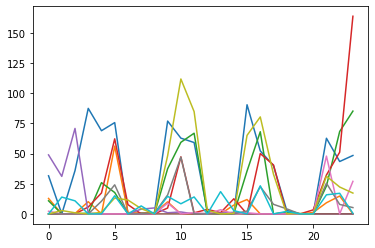

In [118]:
# Plot few lpr curves to check transition points
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

df_partial_0_conc = df_partial_plate.loc[df_partial_plate['conc'] == 0]
#df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]

#print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

#ax.plot(np.transpose(df_0_conc.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
#display(len(df_0_conc))
#display(df_0_conc.head(10))

ax.plot(np.transpose(df_partial_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_partial_0_conc))
display(df_partial_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [130]:
#'''## identify biggest change of peaks in each ccp (chemical_conc_plate)
#0-6,
#6-12,
#12-18,
#18-24
trans_points = [2,8,14,20] # "Paritosh official"
#trans_points = [3,9,15,21] # "Paritosh official"

#df_lpr_min_ccp = df_0_conc.copy()
df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

f_out = open("report.txt","w+")
arr_max_index_per_trans_2 = []
arr_max_index_per_trans_8 = []
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_20 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        print ("\ntrans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("values:" + str(values))
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        print ("arr_diff:"+str(arr_diff))
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        print (save_this)
        
        #print (index_of_max_arr_diff)
        f_out.write(save_this)
        if (trans_point == 2):
            arr_max_index_per_trans_2.append(index_of_max_diff)
        elif (trans_point == 8):
             arr_max_index_per_trans_8.append(index_of_max_diff)
        elif (trans_point == 14):
            arr_max_index_per_trans_14.append(index_of_max_diff)
        else: # (trans_point == 20):
            arr_max_index_per_trans_20.append(index_of_max_diff)
        
f_out.close()
print ("Biggest change of peaks in each ccp is identified")


trans_point:2
arr_diff:[-988.3702000796795, -5.84739992022514, 7.094100037217151, -1.4228999227285417, 1.9405998721718767, 13.997100085765116]
2636_0.0_15839 trans_point: 2, index_of_max_diff: 5


trans_point:8
arr_diff:[-996.9591000080109, -0.41389998197555533, -0.8797999858856188, 21.005499942041926, 12.04949992801994, -11.1364999219775]
2636_0.0_15839 trans_point: 8, index_of_max_diff: 3


trans_point:14
arr_diff:[-997.9983000084758, 1.3608000203967086, 0.08120002597570508, 18.174199890717837, 9.020200035348566, -17.523099854588512]
2636_0.0_15839 trans_point: 14, index_of_max_diff: 3


trans_point:20
arr_diff:[-997.8501999855041, -1.0968000143766408, 0.39830000996589676, 24.297199792414908, -2.274999732524158, 12.239999790489662]
2636_0.0_15839 trans_point: 20, index_of_max_diff: 3

Biggest change of peaks in each ccp is identified


In [89]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp)

30

,chemical_conc_plate,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,chemical_conc
84,2636_0.0_15838,2636,0.0,15838,H01,17.774000,2.640,12.988,11.108000,75.643001,108.446000,43.154,3.389,42.640001,0.123000,5.781000,29.927000,1.754000,0.000,12.847000,0.000000,0.000000,3.534000,0.000,0.279000,0.000,29.255000,27.033000,47.158000,2636_0.0
85,2636_0.0_15838,2636,0.0,15838,H02,0.000000,0.000,0.087,0.000000,21.438000,0.000000,0.920,0.000,0.000000,76.664000,33.916000,113.728999,1.253000,0.000,0.000000,35.074999,135.931999,38.632000,0.000,0.000000,0.000,0.000000,32.725000,9.689000,2636_0.0
86,2636_0.0_15838,2636,0.0,15838,H03,0.000000,0.000,25.315,88.923999,77.628000,71.094001,16.926,0.000,0.000000,68.411000,61.418000,48.318000,25.864001,0.000,0.728000,61.832000,54.055000,60.402000,18.498,0.719000,0.000,43.387000,44.094000,46.196000,2636_0.0
87,2636_0.0_15838,2636,0.0,15838,H04,1.649000,4.070,20.708,68.544999,86.080000,101.624000,21.619,40.298,52.716000,81.497001,82.646000,87.524999,13.095000,0.000,70.766000,64.694000,69.875999,78.007000,24.223,29.824999,37.438,70.214000,77.133999,83.453999,2636_0.0
88,2636_0.0_15838,2636,0.0,15838,H05,0.000000,0.000,0.000,32.134000,55.669000,77.318000,1.314,0.000,0.000000,85.838000,107.257001,93.760000,3.245000,0.000,0.000000,19.973000,6.401000,8.202000,4.457,0.664000,0.332,26.021000,4.796000,14.336000,2636_0.0
90,2636_0.0_15838,2636,0.0,15838,H07,0.000000,0.000,0.000,0.000000,3.392000,0.744000,0.000,0.000,0.000000,69.466999,0.000000,74.503000,17.797000,0.000,0.000000,0.000000,0.000000,0.000000,6.819,0.000000,0.000,30.207000,0.000000,0.000000,2636_0.0
92,2636_0.0_15838,2636,0.0,15838,H09,14.058000,16.977,0.000,3.294000,4.114000,6.730000,0.000,6.784,4.275000,18.208000,49.764000,42.413000,3.478000,11.343,26.880001,1.426000,2.623000,34.460000,1.230,15.486000,0.000,43.179000,51.751000,47.077000,2636_0.0
93,2636_0.0_15838,2636,0.0,15838,H10,0.000000,0.000,0.000,13.069000,69.843001,13.299000,0.709,0.000,0.000000,3.769000,28.596000,9.643000,0.000000,0.678,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,1.482000,0.000000,2636_0.0
94,2636_0.0_15838,2636,0.0,15838,H11,3.163000,0.000,0.000,16.016000,48.484001,51.114000,4.116,0.000,0.584000,24.444000,33.298000,19.231000,0.000000,0.000,0.000000,26.253000,3.792000,17.416000,0.000,1.456000,1.247,0.000000,5.077000,2.435000,2636_0.0
95,2636_0.0_15838,2636,0.0,15838,H12,0.062000,0.319,18.559,0.463000,2.912000,18.575000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,2636_0.0


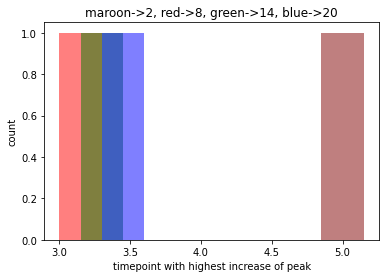


transition points at 2->3 min
mean: 5.0 , stdev: 0.0

transition points at 8->9 min
mean: 3.0 , stdev: 0.0

transition points at 14->15 min
mean: 3.0 , stdev: 0.0

transition points at 20->21 min
mean: 3.0 , stdev: 0.0


In [128]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_2)
x_2_unique = []
y_2 = []
for i in range(len(unique_counts)):
    x_2_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_2.count(unique_counts[i])
    y_2.append(count)

unique_counts = np.unique(arr_max_index_per_trans_8)
x_8_unique = []
y_8 = []
for i in range(len(unique_counts)):
    x_8_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_8.count(unique_counts[i])
    y_8.append(count)

unique_counts = np.unique(arr_max_index_per_trans_14)
x_14_unique = []
y_14 = []
for i in range(len(unique_counts)):
    x_14_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_20)
x_20_unique = []
y_20 = []
for i in range(len(unique_counts)):
    x_20_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_20.count(unique_counts[i])
    y_20.append(count)
    
alpha=0.5
plt.bar(np.array(x_2_unique),       y_2,  color ='maroon',width = 0.3, alpha=alpha)
plt.bar(np.array(x_8_unique) +0.15, y_8,  color ='red',   width = 0.3, alpha=alpha)
plt.bar(np.array(x_14_unique)+0.3,  y_14, color ='green', width = 0.3, alpha=alpha)
plt.bar(np.array(x_20_unique)+0.45, y_20, color ='blue',  width = 0.3, alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->2, red->8, green->14, blue->20")
plt.show()

print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_2),2), ", stdev:", round(np.std(arr_max_index_per_trans_2),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(arr_max_index_per_trans_8),2), ", stdev:", round(np.std(arr_max_index_per_trans_8),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_14),2), ", stdev:", round(np.std(arr_max_index_per_trans_14),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_20),2), ", stdev:", round(np.std(arr_max_index_per_trans_20),2))

In [76]:
####### stop here
a=b

NameError: name 'b' is not defined

In [ ]:
# fig, is the whole thing; ax1 is a subplot in the figure, 
# so we reference it to plot bars and lines there
fig, ax1 = plt.subplots()

ind = np.arange(len(arr_max_index_per_trans_20))
#width = 0.15

# per dimension
colors = ['#00ff00', '#0000ff', '#ff00ff']
markers = ['x','o','v']
#xticklabels = ['50/50', '60/40', '70/30']

#
all_groups = [ arr_max_index_per_trans_8, arr_max_index_per_trans_14, arr_max_index_per_trans_20 ]

# plot each group of bars; loop-variable bar_values contains values for bars
for i, bar_values in enumerate( all_groups ):

  # compute position for each bar
  bar_position = width*i
  ax1.bar( ind + bar_position, bar_values, width, color=colors[i] )

# plot line for each group of bars; loop-variable y_values contains values for lines
for i, y_values in enumerate( all_groups ):

  # moves the beginning of a line to the middle of the bar
  additional_space = (width*i) + (width/2);
  # x_values contains list indices plus additional space
  x_values = [ x + additional_space for x,_ in enumerate( y_values ) ]

  # simply plot the values in y_values
  ax1.plot( x_values, y_values, marker=markers[i], color=colors[i] )

plt.setp([ax1], xticks=ind + width, xticklabels=xticklabels)

plt.tight_layout()
plt.show()

In [ ]:
plt.bar(np.arange(len(arr_max_index_per_trans_2)),arr_max_index_per_trans_2)
plt.show()

In [ ]:
np.savetxt("arr_max_index_per_trans_2.csv", arr_max_index_per_trans_2, delimiter=",")
np.savetxt("arr_max_index_per_trans_8.csv", arr_max_index_per_trans_8, delimiter=",")
np.savetxt("arr_max_index_per_trans_14.csv", arr_max_index_per_trans_14, delimiter=",")
np.savetxt("arr_max_index_per_trans_20.csv", arr_max_index_per_trans_20, delimiter=",")

In [ ]:
display(len(np.unique(df_lpr_min['chemical.id'])))
display(np.unique(df_lpr_min['chemical.id']))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part.boxplot(column=['t1', 't2', 't3', 't4', 't5'])

In [ ]:
df_lpr_min_part.to_csv("df_lpr_min_part.csv", index=False)
display(df_lpr_min_part.head())
display(df_lpr_min_part.tail())

In [ ]:
## identify biggest peaks in each well
#0-5,
#6-11,
#12-17,
#18-23

trans_points = [2,8,14,20] # "official"

df_lpr_min_part_file = open ("df_lpr_min_part.csv") 
df_lpr_min_part_file_lines = df_lpr_min_part_file.readlines()
line_num = -1
arr_t_of_biggest_peak = []
for line in df_lpr_min_part_file_lines:
    #print ("\nline_num:"+str(line_num))

    splited_line = line.split(',')
    
    if (splited_line[0] == "chemical.id"):
        line_num += 1
        continue
    else:
        for trans_index, trans_point in enumerate(trans_points):
            #print ("trans_point:" + str(trans_point))
            biggest_peak = -99
            for i in range (-2, 4):
                current_timepoint = 't' + str(trans_point+i)
                #print (current_timepoint)
                values = df_lpr_min_part[current_timepoint]
                #print (values[line_num])
                if (float(values[line_num]) > biggest_peak):
                    biggest_peak = float(values[line_num])
                    t_of_biggest_peak = current_timepoint
            arr_t_of_biggest_peak.append(t_of_biggest_peak)
        line_num += 1

print (len(arr_t_of_biggest_peak))
print (arr_t_of_biggest_peak)

print (len(np.unique(arr_t_of_biggest_peak)))
print (np.unique(arr_t_of_biggest_peak))

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_part_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

delta_0_conc = lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()